**Prática de Histogramas**

1) 
- Produza a imagem ‘negativa’ do arquivo ‘im_cells.png’
- Com a imagem negativa, produza a imagem original novamente. 
- Mostre lado a lado a imagem original e a negativa. Em qual deles os objetos presentes na imagem são melhor percebidos? Justifique.
- Aplique a imagem uma função logarítmica.


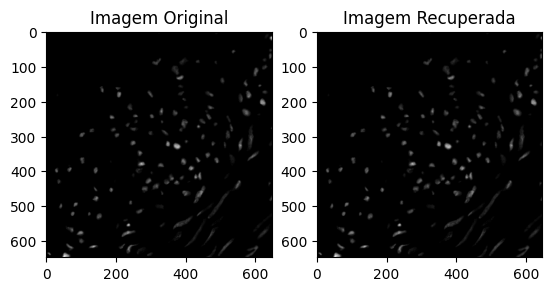

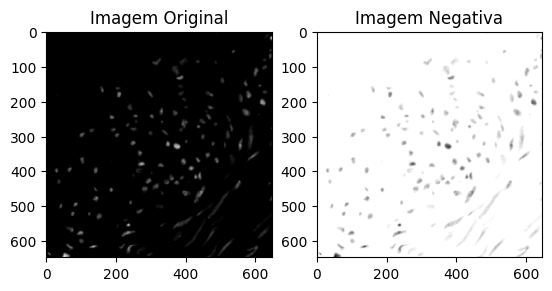

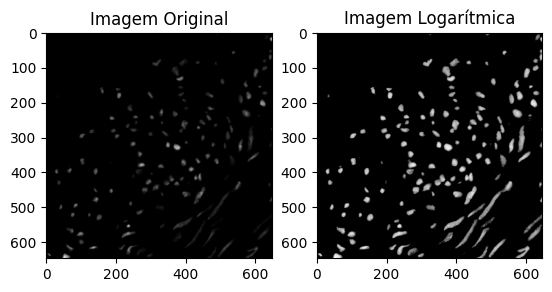

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Carregar imagem
img = cv2.imread('im_cells.png', cv2.IMREAD_GRAYSCALE)

# Produzir imagem negativa
img_neg = 255 - img

# Produzir imagem original novamente
img_orig = 255 - img_neg

# Mostrar imagens original e negativa lado a lado
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagem Original')
plt.subplot(1, 2, 2)
plt.imshow(img_orig, cmap='gray')
plt.title('Imagem Recuperada')
plt.show()


# Mostrar imagens original e negativa lado a lado
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagem Original')
plt.subplot(1, 2, 2)
plt.imshow(img_neg, cmap='gray')
plt.title('Imagem Negativa')
plt.show()

# Aplicar transformação logarítmica
c = 255 / np.log(1 + np.max(img))
img_log = (c * np.log(1 + img)).astype('uint8')

# Mostrar imagens original e logarítmica lado a lado
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagem Original')
plt.subplot(1, 2, 2)
plt.imshow(img_log, cmap='gray')
plt.title('Imagem Logarítmica')
plt.show()

2)
- Abra a imagem 'pout.tif' e mostre seu histograma.
- Equalize a imagem anterior e mostre novamente seu histograma. Mostra a curva de transformação (consulte https://www.mathworks.com/help/images/histogram-equalization.html)
(procurar função OpenCV)



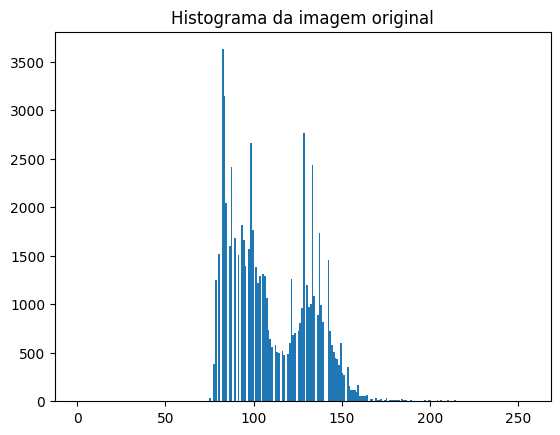

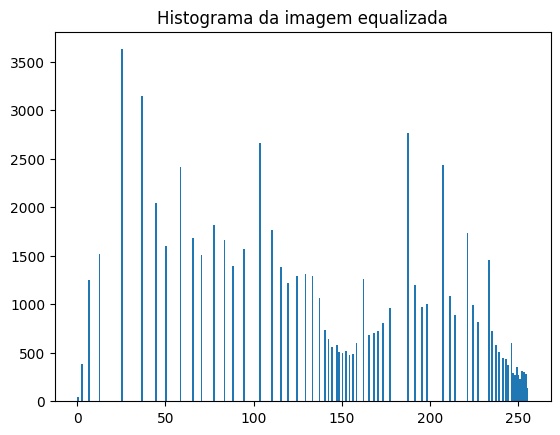

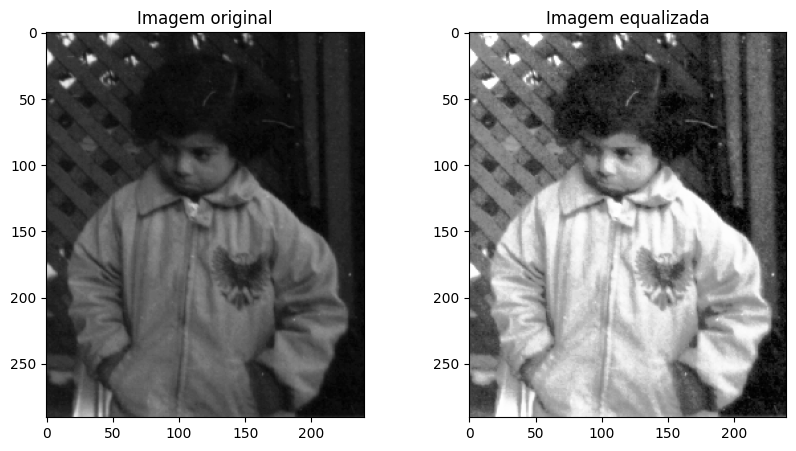

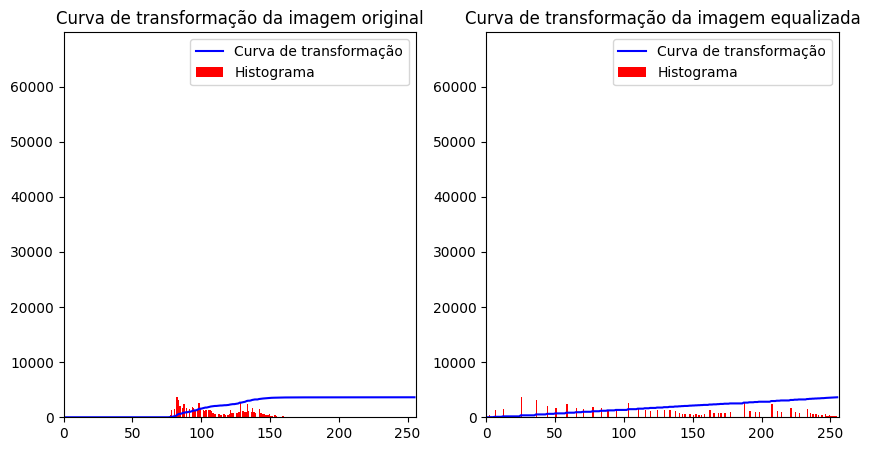

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Abre a imagem
img = cv2.imread('pout.tif', cv2.IMREAD_GRAYSCALE)

# Mostra o histograma
plt.hist(img.ravel(), bins=256, range=(0, 256))
plt.title('Histograma da imagem original')
plt.show()

# Equaliza a imagem
img_eq = cv2.equalizeHist(img)

# Mostra o histograma da imagem equalizada
plt.hist(img_eq.ravel(), bins=256, range=(0, 256))
plt.title('Histograma da imagem equalizada')
plt.show()

# Mostra a imagem original e a imagem equalizada
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Imagem original')
axs[1].imshow(img_eq, cmap='gray')
axs[1].set_title('Imagem equalizada')
plt.show()

# Mostra a curva de transformação
hist, bins = np.histogram(img.ravel(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(cdf_normalized, color='b')
axs[0].hist(img.ravel(), 256, [0, 256], color='r')
axs[0].set_xlim([0, 256])
axs[0].set_ylim([0, 5000])
axs[0].legend(('Curva de transformação', 'Histograma'))
axs[0].set_title('Curva de transformação da imagem original')

hist_eq, bins_eq = np.histogram(img_eq.ravel(), 256, [0, 256])
cdf_eq = hist_eq.cumsum()
cdf_normalized_eq = cdf_eq * hist_eq.max() / cdf_eq.max()

axs[1].plot(cdf_normalized_eq, color='b')
axs[1].hist(img_eq.ravel(), 256, [0, 256], color='r')
axs[1].set_xlim([0, 256])
axs[1].set_ylim([0, 5000])
axs[1].legend(('Curva de transformação', 'Histograma'))
axs[1].set_title('Curva de transformação da imagem equalizada')

plt.show()

3) *Implemente* o algoritmo de equalização de histograma e aplique a imagem ‘imcells.png’. Use o mínimos de laços for - tente realizar operações diretas com matrizes e vetores do numpy
- Aplique o mesmo algortimo 2x na mesma imagem e compare os resultados

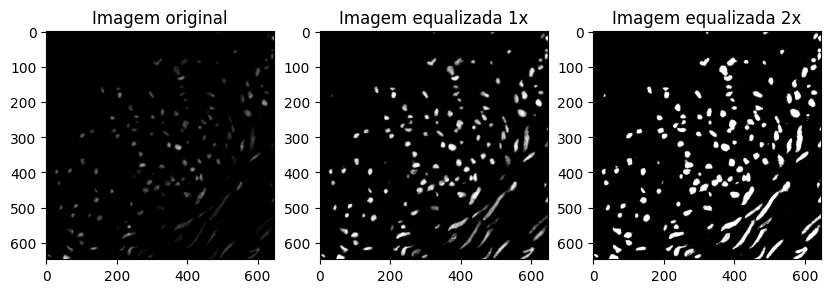

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carrega a imagem em escala de cinza
img = cv2.imread('im_cells.png', cv2.IMREAD_GRAYSCALE)

# Calcula o histograma
hist, _ = np.histogram(img.flatten(), bins=256, range=(0, 256))

# Calcula o histograma acumulado normalizado
cdf = hist.cumsum()
cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())

# Aplica a equalização ao vetor de intensidades
img_eq = cdf_normalized[img.flatten()].astype('uint8')

# Aplica a equalização novamente
img_eq2 = cdf_normalized[img_eq].astype('uint8')

#redimensionar img_eq de volta ao formato da imagem original.
img_eq_reshaped = np.reshape(img_eq, img.shape)
img_eq_reshaped2 = np.reshape(img_eq2, img.shape)

# Mostra as imagens original e equalizada
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(img, cmap='gray')

axs[0].set_title('Imagem original')
axs[1].imshow(img_eq_reshaped, cmap='gray')
axs[1].set_title('Imagem equalizada 1x')
axs[2].imshow(img_eq_reshaped2, cmap='gray')
axs[2].set_title('Imagem equalizada 2x')
plt.show()